# Seção 1: Importação das Bibliotecas

In [ ]:
import tensorflow as tf
display(tf.__version__)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

'2.12.0'

# Seção 2: Importação da Base de Dados

In [ ]:
df = pd.read_csv('/content/kc-house-data.csv') # Houses Data Frame
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Seção 3: Limpeza de Dados

In [ ]:
df = df.drop(['id', 'date', 'zipcode'], axis=1)

# Seção 4: Visualização da Base de Dados

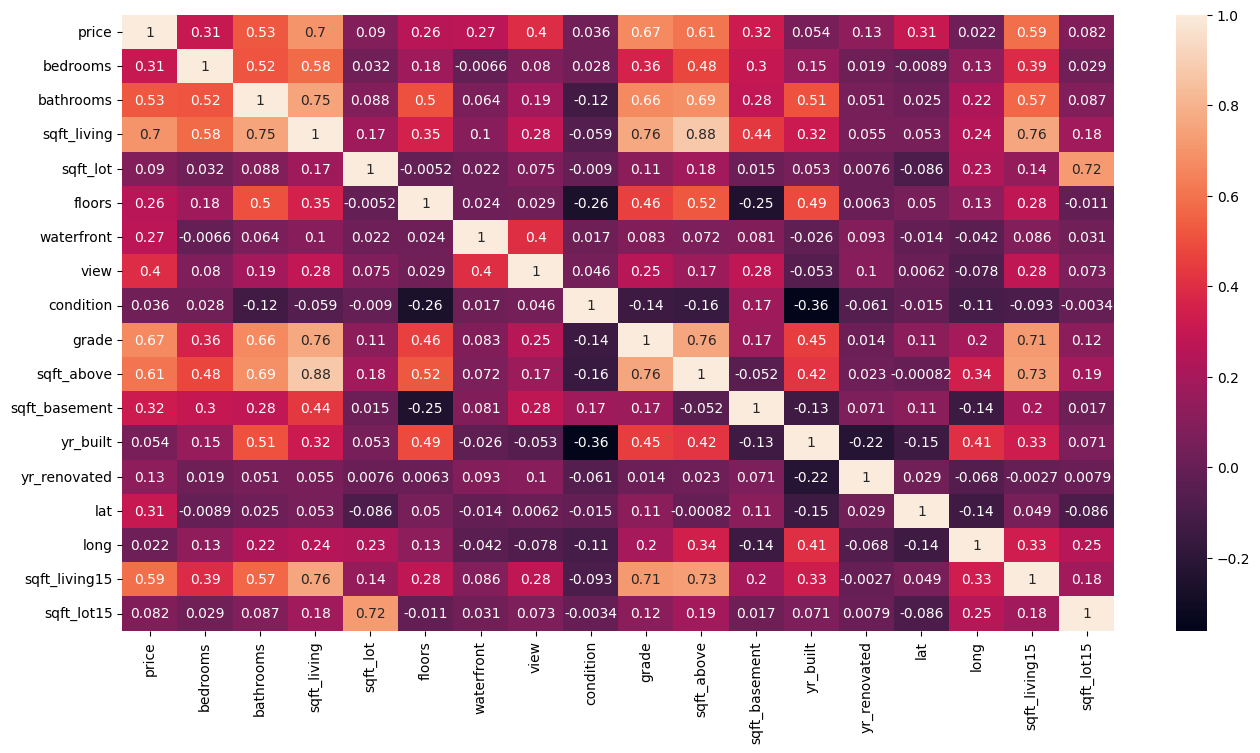

In [ ]:
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(), annot=True);

# Seção 5: Tratamentos Adicionais da Base de Dados

In [ ]:
x = df.iloc[:, 1:].values
y = df.iloc[:, :1].values

In [ ]:
x.shape, y.shape

((21613, 17), (21613, 1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_y = MinMaxScaler()
scaler_x = MinMaxScaler()
y = scaler_y.fit_transform(y)
x = scaler_x.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
print("Train", x_train.shape, y_train.shape)
print("Test ", x_test.shape, y_test.shape)

Train (16209, 17) (16209, 1)
Test  (5404, 17) (5404, 1)


# Seção 6: Construção e Treinamento do Modelo

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(17,)))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1,   activation='linear'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               1800      
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 22,101
Trainable params: 22,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss="mean_squared_error")

In [ ]:
epochs_hist = model.fit(x_train, y_train, epochs=25, batch_size=50, validation_split=0.2)

Epoch 1/25
260/260 [==============================] - 4s 5ms/step - loss: 7.6458e-04 - val_loss: 6.5496e-04
Epoch 2/25
260/260 [==============================] - 1s 3ms/step - loss: 5.4664e-04 - val_loss: 5.8518e-04
Epoch 3/25
260/260 [==============================] - 1s 3ms/step - loss: 4.5056e-04 - val_loss: 5.0826e-04
Epoch 4/25
260/260 [==============================] - 1s 2ms/step - loss: 4.0208e-04 - val_loss: 5.8424e-04
Epoch 5/25
260/260 [==============================] - 1s 2ms/step - loss: 4.2024e-04 - val_loss: 4.6331e-04
Epoch 6/25
260/260 [==============================] - 1s 2ms/step - loss: 3.4598e-04 - val_loss: 4.4512e-04
Epoch 7/25
260/260 [==============================] - 1s 3ms/step - loss: 3.4451e-04 - val_loss: 4.1186e-04
Epoch 8/25
260/260 [==============================] - 1s 3ms/step - loss: 3.3080e-04 - val_loss: 4.4723e-04
Epoch 9/25
260/260 [==============================] - 1s 3ms/step - loss: 3.2255e-04 - val_loss: 4.1991e-04
Epoch 10/25
260/260 [=======

# Seção 7: Resultados TensorFlow

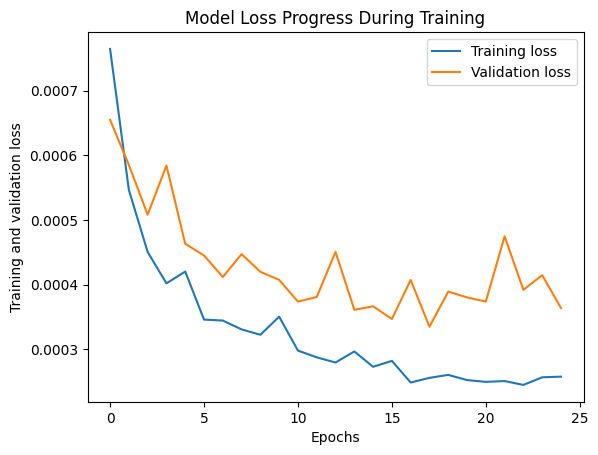

In [ ]:
plt.plot(epochs_hist.history['loss']);
plt.plot(epochs_hist.history['val_loss']);
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training and validation loss')
plt.legend(('Training loss', 'Validation loss'));

In [ ]:
y_predict = model.predict(x_test)

169/169 [==============================] - 0s 1ms/step


In [ ]:
y_predict_origin = scaler_y.inverse_transform(y_predict)
y_test_origin = scaler_y.inverse_transform(y_test)

In [ ]:
k = x_test.shape[1]
k

17

In [ ]:
n = len(x_test)
n

5404

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

mse = mean_squared_error(y_predict_origin, y_test_origin)
mae = mean_absolute_error(y_predict_origin, y_test_origin)
rmae = sqrt(mse)
r2 = r2_score(y_predict_origin, y_test_origin)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("MAE:", mae)
print("MSE:", mse)
print("RMAE:", rmae)
print("R2 Score:", r2)
print("Adj R2:", adj_r2)

MAE: 83544.60541092246
MSE: 20864187282.134384
RMAE: 144444.40896806767
R2 Score: 0.8220988940296721
Adj R2: 0.8215373792132042


In [ ]:
y_predict_origin[5:10],  y_test_origin[5:10]

(array([[424159.  ],
        [455427.94],
        [572871.56],
        [269914.5 ],
        [541123.1 ]], dtype=float32),
 array([[430000.],
        [532500.],
        [530000.],
        [294010.],
        [635000.]]))